# MNIST Data Set

### Data Import & Set Up

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [2]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
X, y = mnist['data'], mnist['target']

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

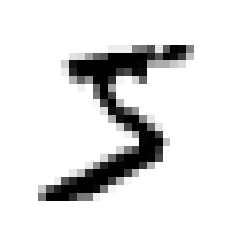

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [7]:
y[0]

'5'

In [8]:
import numpy as np

y = y.astype(np.uint8)

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [10]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

### SGD Classifier Training and Evaluation

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

In [ ]:
sgd_clf.predict([some_digit])

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
precision_score(y_train_5, y_train_pred)

In [ ]:
recall_score(y_train_5, y_train_pred)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

In [ ]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [ ]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", label="Precision vs Recall")
    
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [ ]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [ ]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [ ]:
precision_score(y_train_5, y_train_pred_90)

In [ ]:
recall_score (y_train_5, y_train_pred_90)

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    
plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

### Compare SGD to Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

In [ ]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

In [ ]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_auc_score(y_train_5, y_scores_forest)

In [ ]:
y_scores_forest_80 = (y_scores_forest >= 0.8)

precision_score(y_train_5, y_scores_forest_80)
recall_score(y_train_5, y_scores_forest_80)

### Carry Out Multi-Label Classification with Support Vector Classifier

In [ ]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])

In [ ]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

In [ ]:
np.argmax(some_digit_scores)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)

In [ ]:
ovr_clf.predict([some_digit])

## Exercise 1

### Try Achieving an Accuracy of > 97% - Using K Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

In [ ]:
knn_clf.predict(X_train[:10])

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors':[2, 5, 10, 50, 100, 500, 1000, 5000], 'weights':['uniform', 'distance']}

knn_search = GridSearchCV(knn_clf, param_grid, 'accuracy', 4, verbose=5)
knn_search.fit(X_train, y_train)

In [ ]:
knn_search.best_estimator_

In [ ]:
param_grid = {'n_neighbors':[3,4,5,6,7,8,9], 'weights':['distance']}

knn_search = GridSearchCV(knn_clf, param_grid, 'accuracy', 4, verbose=5)
knn_search.fit(X_train, y_train)

In [ ]:
best_knn = knn_search.best_estimator_

best_knn_test_predictions = best_knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

best_knn_score = accuracy_score(y_test, best_knn_test_predictions)

In [ ]:
print(best_knn_score)

## Exercise 2
### Shift images by 1 pixel each way and add to dataset, then re-train model

In [11]:
from scipy.ndimage.interpolation import shift

def shift_pixel(image, direction):
    up_down = 0
    left_right = 0
    
    if direction == 'up':
        up_down = -1
    elif direction == 'down':
        up_down = 1
    elif direction == 'left':
        left_right = -1
    else:
        left_right = 1
    
    return shift(image, [up_down, left_right], cval=0)

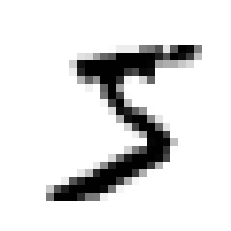

In [12]:
plt.imshow(shift_pixel(some_digit_image, 'right'), cmap="binary")
plt.axis("off")
plt.show()

In [13]:
import itertools

def append_training(train_set):
    shifted_set = [[],[],[],[]]
    shifting = ['up', 'down', 'left', 'right']
    for flat_im in train_set:
        image = flat_im.reshape(28, 28)
        for i, direction in enumerate(shifting):
            shifted_image = shift_pixel(image, direction)
            flat_shift_im = shifted_image.reshape(784)
            shifted_set[i].append(flat_shift_im)
    return list(itertools.chain.from_iterable(shifted_set))

In [14]:
X_train_new = X_train.copy()
out_train_new = np.array(append_training(X_train))

X_train_new = np.append(X_train_new, out_train_new, 0)
y_train_new = np.tile(y_train, 5)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_clf = KNeighborsClassifier(n_neighbors=3, weights='distance', n_jobs=-1)
knn_clf.fit(X_train_new, y_train_new)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='distance')

In [16]:
from sklearn.metrics import accuracy_score

knn_clf_test_predictions = knn_clf.predict(X_test)
knn_clf_accuracy = accuracy_score(y_test, knn_clf_test_predictions)

print(knn_clf_accuracy)

0.9763


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_clf = KNeighborsClassifier()
param_grid = {'n_neighbors':[2,3,4,5,6,7], 'weights':['distance']}

knn_search = GridSearchCV(knn_clf, param_grid, 'accuracy', -1, verbose=10)
knn_search.fit(X_train_new, y_train_new)

In [ ]:
best_knn = knn_search.best_estimator_

best_knn_test_predictions = best_knn.predict(X_test)
best_knn_accuracy = accuracy_score(y_test, best_knn_test_predictions)

print(best_knn_accuracy)